In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering

In [2]:
data = pd.read_csv(os.path.join('data', 'data.csv'))
data = data[['difficulty'] + ['Q' + str(i) for i in range(1, 29)]]
data

,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,4,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,4,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5815,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5816,4,4,4,4,4,4,4,4,4,4,...,5,5,5,5,4,5,5,5,5,5
5817,4,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
5818,2,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


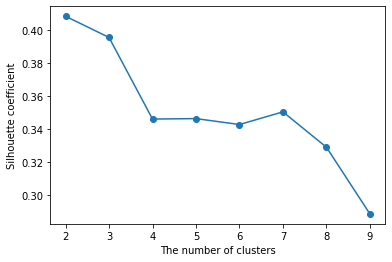

In [29]:
# 记录不同类数的轮廓系数结果
x_label_silhouette_score = []
y_label_silhouette_score = []
from sklearn.metrics import silhouette_score
for n_clusters in range(2, 10):
    # 采用基于余弦相似度的聚类
    
    model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward').fit(data)
    # 计算轮廓系数
    silhouette_avg = silhouette_score(data, model.labels_, metric='euclidean')
    x_label_silhouette_score.append(n_clusters)
    y_label_silhouette_score.append(silhouette_avg)
    
import matplotlib.pyplot as plt
plt.plot(x_label_silhouette_score, y_label_silhouette_score, marker="o")
plt.xlabel("The number of clusters")
plt.ylabel("Silhouette coefficient")
plt.show()

In [23]:
clustering = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(data)
clustering.labels_

array([1, 1, 0, ..., 0, 2, 2], dtype=int64)

In [24]:
import numpy as np
for i in set(list(clustering.labels_)):
    print(i, len(np.argwhere(clustering.labels_==i)))

0 2552
1 2441
2 827


In [7]:
tsne_2=TSNE(n_components=2, metric='euclidean', init='pca')
X_tsne_2d = tsne_2.fit_transform(data)

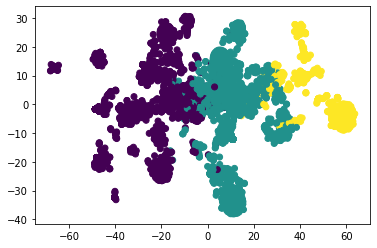

In [25]:
plt.scatter(X_tsne_2d[:, 0], X_tsne_2d[:, 1], c=clustering.labels_)
plt.show()

In [ ]:
### average